In [1]:
#import the libraries that we need, NumPy for mathematical operations and 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Create a variable corresponding to the file name. This file must be uploaded to Google Colab. If working offline, this file must be in the same directory as the .py file. 
infile = "Day2CountryInfo2018.csv"

#Create empty lists to store our data
country_list = []
medal_list = []
lat_list = []
long_list = []
gdp_list = []
pop_list = []


#These lines open "infile", which we have assigned to our desired file name. 
#The "r" means we want to read this file.  
#This information is all saved as the variable "csv_file"
with open (infile, 'r') as csv_file:
 
    #The first line of the csv file is not important information for us, it's just the headers
    #The following command processes that first line so when we loop over the rest it's not included
    header = csv_file.readline()

    #This for loop loops over all of the lines in "csv_file" which we assigned all of the data in the file to
    for line in csv_file:
        
        #The split function will split up lines based on whatever you designate.
        #Here we are designating to split each line at the commas, creating three variables 
        country_info = line.split(",")

        #Add the country name to the country list
        country_list.append(country_info[0])
        
        #For each country, we want to tally up the total number of medals, so we create a variable for the tally
        medal_total = 0
        
        #The number of gold, silver and bronze medal are variables 1, 2, and 3 in the "country_info" list
        #This loops over each of those
        for i in country_info[1:4]:
            #This line adds the number of gold silver or bronze medals to the medal total
            medal_total += int(i)

        medal_list.append(medal_total)
        lat_list.append(float(country_info[4]))
        long_list.append(float(country_info[5]))
        gdp_list.append(float(country_info[6]))
        pop_list.append(float(country_info[7]))


#To calculate the gpd per capita per (per 5000 pop.) we have to divide the values from the gpd and population lists and multiply by 5000
#Turning lists into arrays can make math much faster. Here for "gdp_per_capita" we calculated it in one line.
gdp_per_capita = np.array(gdp_list)/np.array(pop_list)*5000



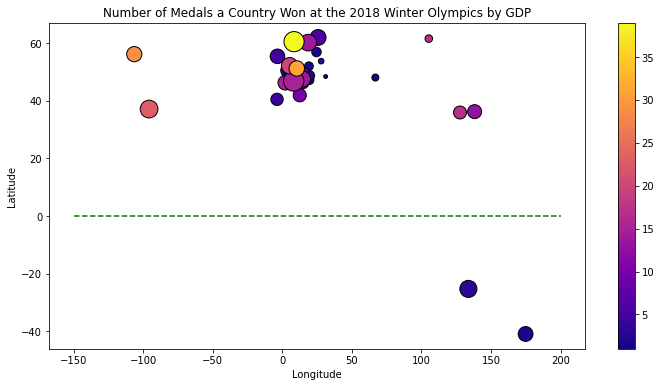

In [4]:
#This line create a new figure and simply sets its dimensions to be a bit larger so it's easier to read
plt.figure(figsize=(12,6))
#You can change the size and color of the scatter points to describe other variables. 
#Here we set the color "c" to correspond with the number of medals won and the size "s" to the gdp per capita
plt.scatter(long_list, lat_list, c=medal_list, s=gdp_per_capita, cmap='plasma',edgecolors='black')
plt.hlines((0),-150,200,linestyles='dashed',color='g')
plt.title("Number of Medals a Country Won at the 2018 Winter Olympics by GDP")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar()
plt.savefig('Day_2_HW.png')